Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
Требуется выполнить следующее задание:
# Задание

1 Загрузите файл HR.csv в pandas dataframe. 5

2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение). 10

3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
10

4 Рассчитайте сколько сотрудников работает в каждом
департаменте.
5

5 Показать распределение сотрудников по зарплатам. 5

6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5

7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом. 10

8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
10
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
20

10 Загрузить jupyter notebook с решение на github и прислать ссылку 5
Итого - максимум 85 баллов

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


###2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


###3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

<Axes: >

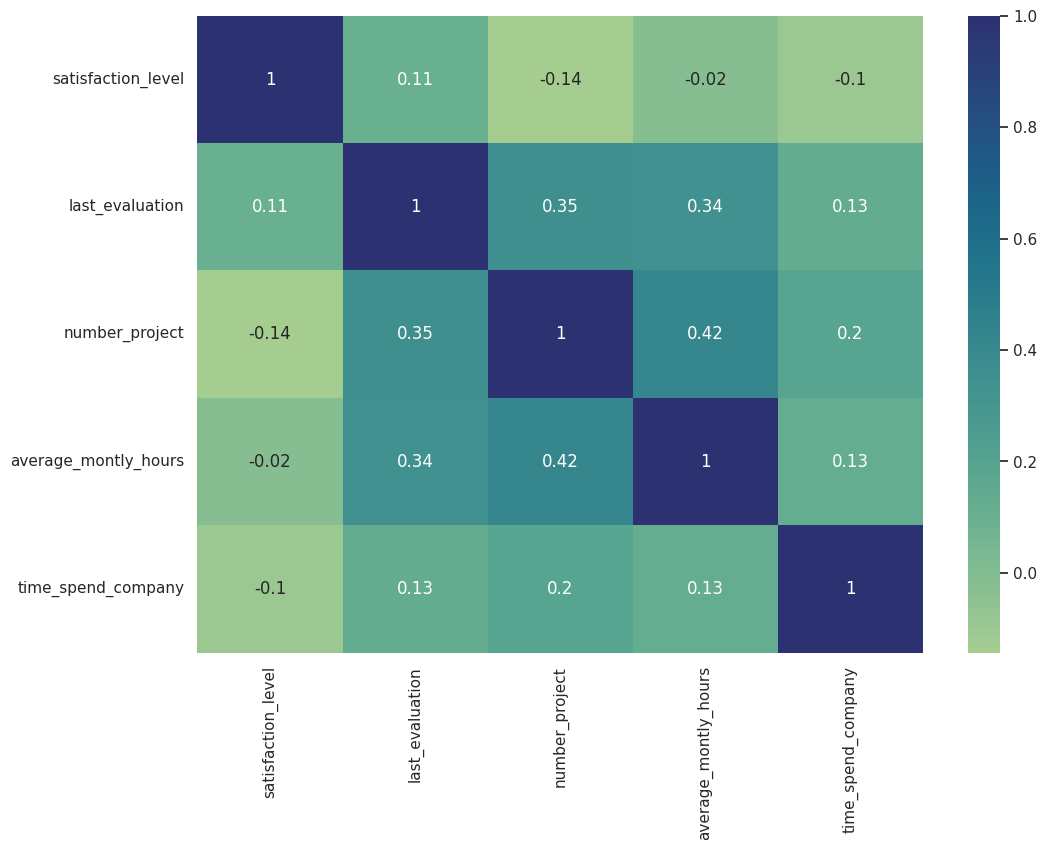

In [ ]:
df_corr = df.drop(df.columns[[5, 6, 7, 8, 9]], axis=1)

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(df_corr.corr(), annot=True, cmap='crest')

Как мы видим две самые скоррелированные переменные это number_project u average_montly_hours а две наименее скоррелированные переменные это satisfaction_level u average_montly_hours

###4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
df.groupby('department').count()['satisfaction_level']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

###5. Показать распределение сотрудников по зарплатам.

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

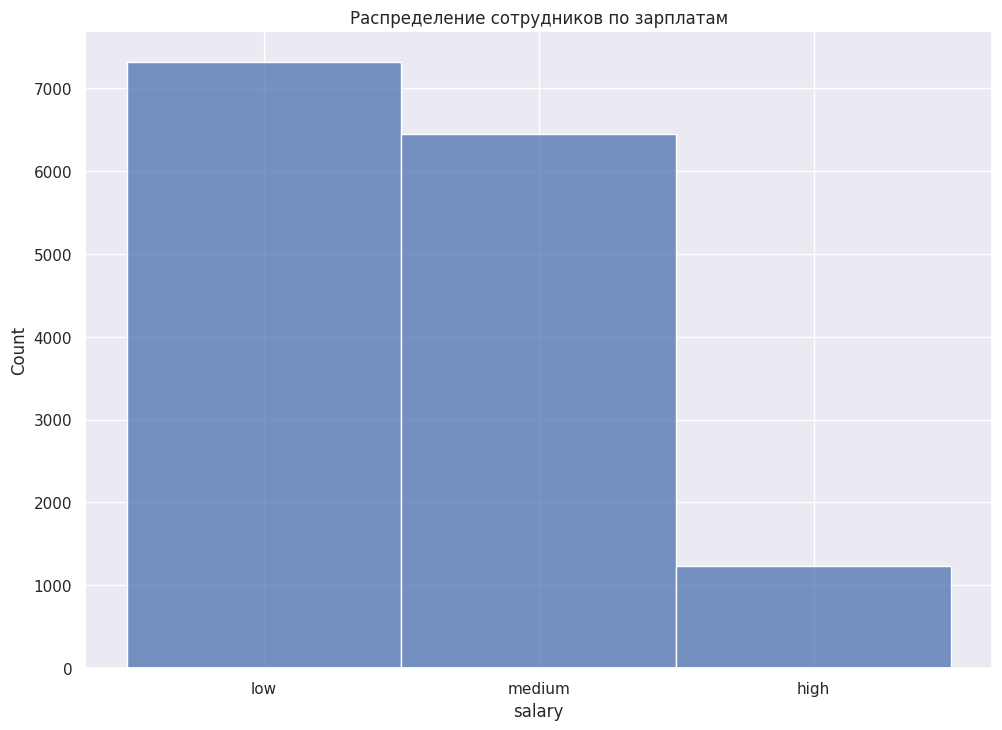

In [ ]:
sns.histplot(df['salary'])
plt.title('Распределение сотрудников по зарплатам')

###6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
df_gr = df.groupby('department', as_index=False)['salary'].value_counts()
df_gr.head(10)

,department,salary,count
0,IT,low,609
1,IT,medium,535
2,IT,high,83
3,RandD,medium,372
4,RandD,low,364
5,RandD,high,51
6,accounting,low,358
7,accounting,medium,335
8,accounting,high,74
9,hr,medium,359


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам в каждом департаменте')

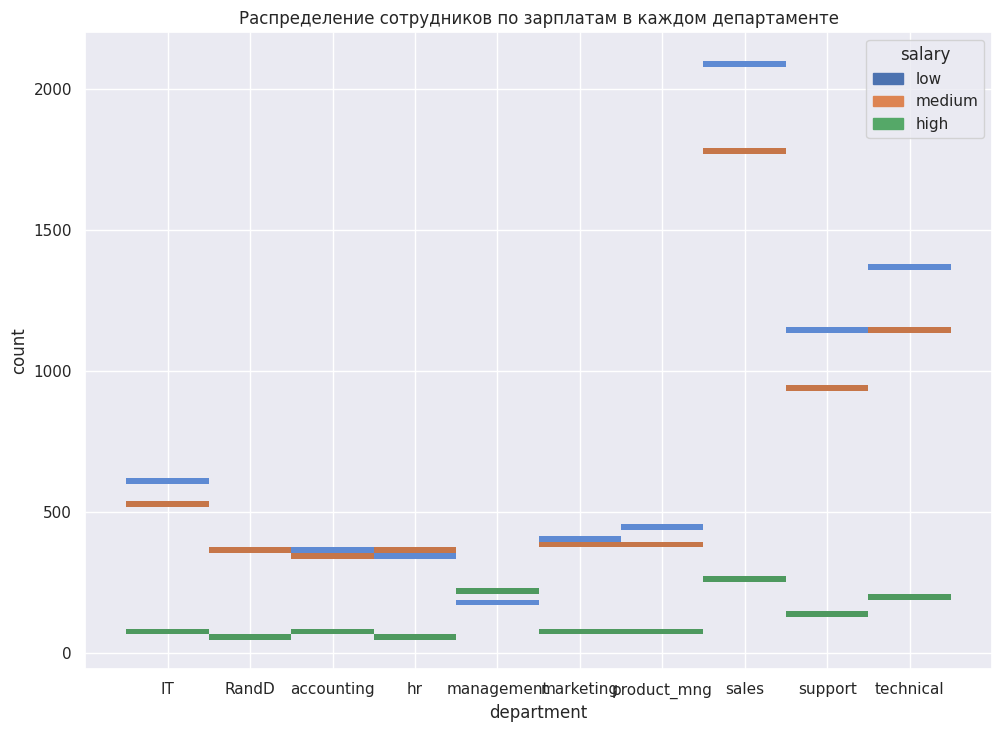

In [ ]:
sns.histplot(df_gr, bins=100, x='department', y='count', hue='salary')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')

С хорошими визуализациями у меня проблема((

###7. Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низким окладом.

In [ ]:
high_sal = df[df.salary == 'high']['average_montly_hours']
low_sal = df[df.salary == 'low']['average_montly_hours']
low_sal

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 7316, dtype: int64

Проверим на нормальность распределение данных

In [ ]:
print(f"high_sal: {st.kstest(high_sal, 'norm')}")
print(f"low_sal: {st.kstest(low_sal, 'norm')}")

high_sal: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=96, statistic_sign=-1)
low_sal: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=96, statistic_sign=-1)


Из теста Колмагорова-Смирнова видно, что p=0 для обоих выборок, значит у нас не нормальные распределения

Попробуем нормализовать данные...

Text(0.5, 1.0, 'Log-Transformed Data')

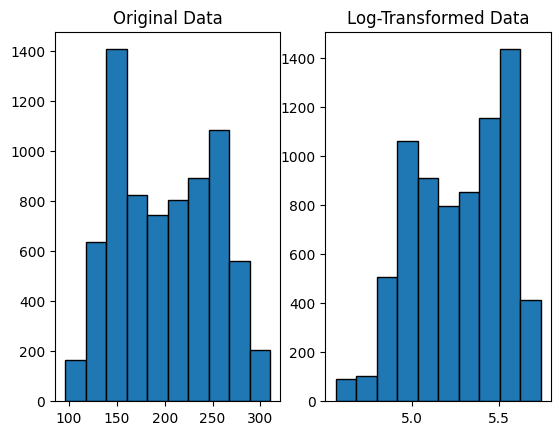

In [ ]:
data_log = np.log(low_sal) # sqrt, cbrt

fig, axs = plt.subplots(nrows= 1 , ncols= 2 )

axs[0]. hist (low_sal, edgecolor='black')
axs[1]. hist (data_log, edgecolor='black')

axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

In [ ]:
print(f"low_sal: {st.kstest(data_log, 'norm')}")

low_sal: KstestResult(statistic=0.9999974947569542, pvalue=0.0, statistic_location=4.564348191467836, statistic_sign=-1)


<Axes: >

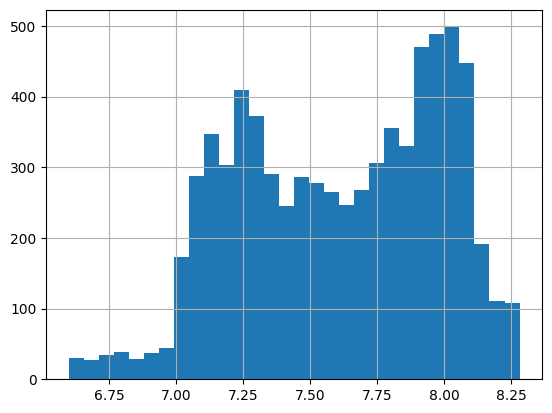

In [ ]:
np.log2(abs(low_sal)+1).hist(bins=30)

Не один из способов нормализации данных (log, sqrt, cbrt) к положительному результату не привел. Тогда проведем тест Манна-Уитни


In [ ]:
stat, p = st.mannwhitneyu(high_sal, low_sal)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Text(0.5, 1.0, 'Среднемесячное количество часов')

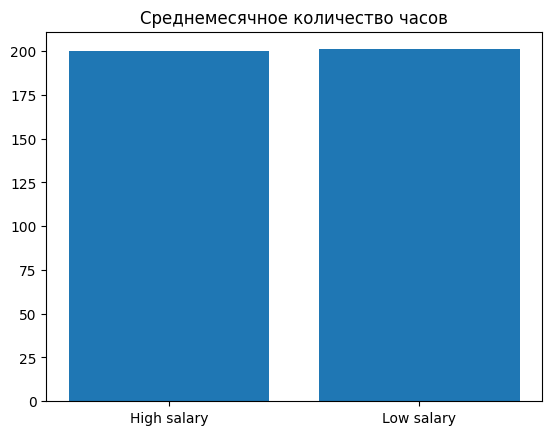

In [ ]:
plt.bar(['High salary', 'Low salary'], [high_sal.mean(), low_sal.mean()])
plt.title('Среднемесячное количество часов')

In [ ]:
high_sal.mean() > low_sal.mean()

False

Из нашего исследова видно, что сотрудники с высоким окладом не проводят на работе больше времени, чем сотрудники с низким окладом, их время примерно равно (сотрудники с низким окладом работают чуть больше).

###8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 10

- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [ ]:
left = df[df.left == 1]
works = df[df.left == 0]

array([0, 1])

In [ ]:
print("Для уволившихся:")
promotion = round(len(left[left.promotion_last_5years == 1]) / len(left) * 100, 2)
print(f"доля сотрудников с повышением за последние 5 лет: {promotion}")
print(f"средняя степень удовлетворенности: {round(left['satisfaction_level'].mean(), 2)}")
print(f"средняя количество проектов: {round(left['number_project'].mean(), 2)}")

Для уволившихся:
доля сотрудников с повышением за последние 5 лет: 0.53
средняя степень удовлетворенности: 0.44
средняя количество проектов: 3.86


In [ ]:
print("Для работающих:")
promotion = round(len(works[works.promotion_last_5years == 1]) / len(works) * 100, 2)
print(f"доля сотрудников с повышением за последние 5 лет: {promotion}")
print(f"средняя степень удовлетворенности: {round(works['satisfaction_level'].mean(), 2)}")
print(f"средняя количество проектов: {round(works['number_project'].mean(), 2)}")

Для работающих:
доля сотрудников с повышением за последние 5 лет: 2.63
средняя степень удовлетворенности: 0.67
средняя количество проектов: 3.79


###9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [4]:
left = df['left']
data = df.drop(df.columns[[6, 8, 9]], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, left, train_size=0.7, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [6]:
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

Точность предсказания полученной модели LDA 75,6%